# Gradient descent functions

### Hi there, the main goal of this notebook is create the functions that calculates the gradient to the slope "m" and intercept "b" from a linear function applied in linear regression models.

First step: Import the basic packages:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

Second step: Create the function to calculate the gradient descent in **b** intercept point according to the next definition:

$$ - \frac{2}{N}\sum_{i = 1}^{N}(y_{i}-(mx_{i}+b)) $$

Where:

* __N__ is the number of points we've in our dataset
* __m__ is the current gradient guess
* __b__ is the current intercept guess

In [5]:
def get_gradient_at_b(x, y, b, m):   
    """
    Calculate the best value of **b** to reduce the loss function 
    to the linear regression model:
    
    Parameters
    ----------
    
    x: List,
      List with the values of dataset to make the training and prediction, that means, the predictors values.
    
    y: List,
      List with the values of dataset wich you want predict, that means, the target variable .

    b: double,
      Last result of intercept __b__ into linear regression equation got in the first training 
      or a initialized value. This value will be improved according to the iterations to get its 
      best value and minimize the loss.
    
    m: double,
      Last result of slope __m__ into linear regression equation got in the first training 
      or a initialized value.
    """
    N = len(x)
    diff = 0
    for i in range(N):
        x_val = x[i]
        y_val = y[i]
        diff += (y_val - ((m * x_val) + b))
    b_gradient = -(2/N) * diff   
    return b_gradient



Third step: Create the function to calculate the gradient descent to **m** slope according to the next definition:

$$ - \frac{2}{N}\sum_{i = 1}^{N}x_{i}(y_{i}-(mx_{i}+b)) $$

Where:

* __N__ is the number of points we've in our dataset
* __m__ is the current gradient guess
* __b__ is the current intercept guess

In [7]:
def get_gradient_at_m(x, y, b, m):
    """
    Calculate the value of slope m associated to the linear regression model:
    
    Parameters
    ----------
    
    x: List,
      List with the values of dataset to make the training and prediction, that means, the predictors values.
    
    y: List,
      List with the values of dataset wich you want predict, that means, the target variable .

    b: double,
      Last result of intercept __b__ into linear regression equation got in the first training 
      or a initialized value. 
    
    m: double,
      Last result of slope __m__ into linear regression equation got in the first training 
      or a initialized value. This value will be improved according to the iterations to get its 
      best value and minimize the loss.
    """    
    N = len(x)
    diff = 0
    for i in range(N):
        x_val = x[i]
        y_val = y[i]
        diff += x_val * (y_val - ((m * x_val) + b))
    m_gradient = -(2/N) * diff  
    return m_gradient

The next function have into account all the parameters explained above mixed with the learning rate, with aim to get the best values to reduce the loss:

In [8]:
def step_gradient(b_current, m_current, x, y, learning_rate):
    """
    Calculate the values of slope b and intercept m associated to the linear regression model:
    
    Parameters
    ----------
    
    x: List,
      List with the values of dataset to make the training and prediction, that means, the predictors values.
    
    y: List,
      List with the values of dataset wich you want predict, that means, the target variable .

    b_current: double,
      Last result of intercept __b__ into linear regression equation got in the first training 
      or a initialized value. 
    
    m_current: double,
      Last result of slope __m__ into linear regression equation got in the first training 
      or a initialized value. This value will be improved according to the iterations to get its 
      best value and minimize the loss.
    
    learning_rate: double,
      It's a number that help us to minimize the loss function and find its convergence. For instance,
      this value could be 0.0001, 0.01 or 0.001 but you must be carefully to avoid highly steps when
      you're searching the best parameters although you should establish the number of iterations.
      
    Returns
    -------
    The best m and b values to the linear regression model.
      
    """    
    b_gradient = get_gradient_at_b(x, y, b_current, m_current)
    m_gradient = get_gradient_at_m(x, y, b_current, m_current)
    b = b_current - (learning_rate * b_gradient)
    m = m_current - (learning_rate * m_gradient)
    return [b, m]




In [10]:
def gradient_descent(x, y, learning_rate, num_iterations):
    """
    Calculate the best values of slope m and intercept b associated to the linear regression model:
    
    Parameters
    ----------
    
    x: List,
      List with the values of dataset to make the training and prediction, that means, the predictors values.
    
    y: List,
      List with the values of dataset wich you want predict, that means, the target variable .
    
    learning_rate: double,
      It's a number that help us to minimize the loss function and find its convergence. For instance,
      this value could be 0.0001, 0.01 or 0.001 but you must be carefully to avoid highly steps when
      you're searching the best parameters although you should establish the number of iterations.
    
    num_iterations: double,
      This number specify how many times you want calculate the gradients and apply them the learning
      rate to get the best parameters.
      
    Returns
    -------
    The best m and b values to the linear regression model.
      
    """  
    m = 0
    b = 0
    for i in range(num_iterations):
        b, m = step_gradient(b, m, x, y, learning_rate)
    return [b,m]

Now, considering that we apply al the functions above to calculate the best values to a linear regression model,
we'll test with two lists associated to a dataframe with revenue information in 12 months:

In [11]:
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
revenue = [52, 74, 79, 95, 115, 110, 129, 126, 147, 146, 156, 184]

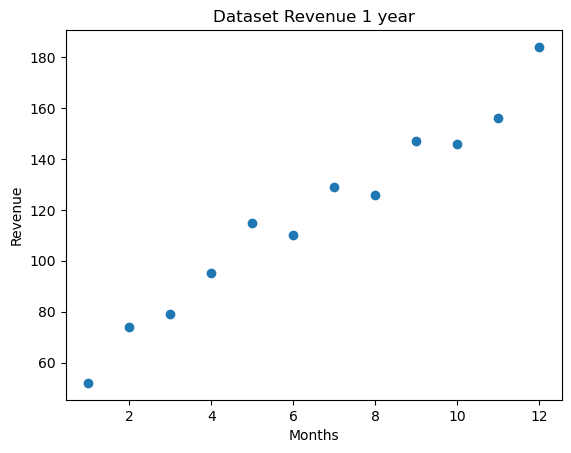

In [16]:
plt.plot(months, revenue, 'o')
plt.xlabel('Months')
plt.ylabel('Revenue')
plt.title('Dataset Revenue 1 year')
plt.show()

In [17]:
b, m = gradient_descent(months, revenue, 0.01, 1000)

In [24]:
print('Best value to b is {}'.format(round(b, 2)))
print('Best value to m is {}'.format(round(m, 2)))

Best value to b is 49.6
Best value to m is 10.46


In [25]:
y = [m*x + b for x in months]

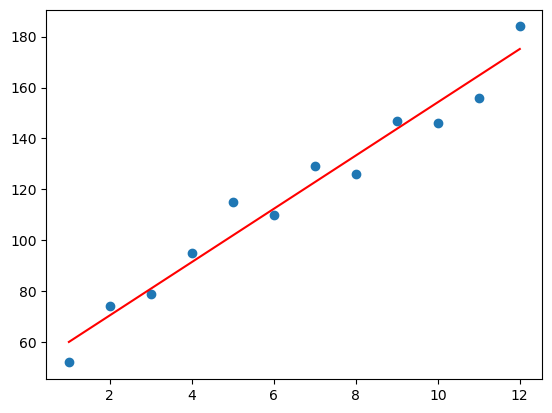

In [27]:
plt.plot(months, revenue, "o")
plt.plot(months, y, color = 'r')
plt.show()